## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged_data["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

dups_df = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
print(dups_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_data.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].count()

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = cleaned_data.set_index("Drug Regimen")
drug_regimen_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

ramicane_data = drug_regimen_df.loc[["Ramicane"],"Tumor Volume (mm3)"]
ramicane_mean = round(ramicane_data.mean(),2)
ramicane_median = round(ramicane_data.median(),2)
ramicane_mode = ramicane_data.mode()
ramicane_var = round(ramicane_data.var(ddof=0),2)
ramicane_std = round(ramicane_data.std(ddof=0),2)
ramicane_sem = round(ramicane_data.sem(),2)

Capomulin_data = drug_regimen_df.loc[["Capomulin"],"Tumor Volume (mm3)"]
Capomulin_mean = round(Capomulin_data.mean(),2)
Capomulin_median = round(Capomulin_data.median(),2)
Capomulin_mode = Capomulin_data.mode()
Capomulin_var = round(Capomulin_data.var(ddof=0),2)
Capomulin_std = round(Capomulin_data.std(ddof=0),2)
Capomulin_sem = round(Capomulin_data.sem(),2)

Infubinol_data = drug_regimen_df.loc[["Infubinol"],"Tumor Volume (mm3)"]
Infubinol_mean = round(Infubinol_data.mean(),2)
Infubinol_median = round(Infubinol_data.median(),2)
Infubinol_mode = Infubinol_data.mode()
Infubinol_var = round(Infubinol_data.var(ddof=0),2)
Infubinol_std = round(Infubinol_data.std(ddof=0),2)
Infubinol_sem = round(Infubinol_data.sem(),2)

Placebo_data = drug_regimen_df.loc[['Placebo'],"Tumor Volume (mm3)"]
Placebo_mean = round(Placebo_data.mean(),2)
Placebo_median = round(Placebo_data.median(),2)
Placebo_mode = Placebo_data.mode()
Placebo_var =round(Placebo_data.var(ddof=0),2)
Placebo_std = round(Placebo_data.std(ddof=0),2)
Placebo_sem = round(Placebo_data.sem(),2)

Ceftamin_data = drug_regimen_df.loc[['Ceftamin'],"Tumor Volume (mm3)"]
Ceftamin_mean = round(Ceftamin_data.mean(),2)
Ceftamin_median = round(Ceftamin_data.median(),2)
Ceftamin_mode = Ceftamin_data.mode()
Ceftamin_var = round(Ceftamin_data.var(ddof=0),2)
Ceftamin_std = round(Ceftamin_data.std(ddof=0),2)
Ceftamin_sem = round(Ceftamin_data.sem(),2)

Stelasyn_data = drug_regimen_df.loc[['Stelasyn'],"Tumor Volume (mm3)"]
Stelasyn_mean = round(Stelasyn_data.mean(),2)
Stelasyn_median = round(Stelasyn_data.median(),2)
Stelasyn_mode = Stelasyn_data.mode()
Stelasyn_var = round(Stelasyn_data.var(ddof=0),2)
Stelasyn_std = round(Stelasyn_data.std(ddof=0),2)
Stelasyn_sem = round(Stelasyn_data.sem(),2)

Zoniferol_data = drug_regimen_df.loc[['Zoniferol'],"Tumor Volume (mm3)"]
Zoniferol_mean = round(Zoniferol_data.mean(),2)
Zoniferol_median = round(Zoniferol_data.median(),2)
Zoniferol_mode = Zoniferol_data.mode()
Zoniferol_var = round(Zoniferol_data.var(ddof=0),2)
Zoniferol_std = round(Zoniferol_data.std(ddof=0),2)
Zoniferol_sem = round(Zoniferol_data.sem(),2)

Ketapril_data = drug_regimen_df.loc[['Ketapril'],"Tumor Volume (mm3)"]
Ketapril_mean = round(Ketapril_data.mean(),2)
Ketapril_median = round(Ketapril_data.median(),2)
Ketapril_mode = Ketapril_data.mode()
Ketapril_var = round(Ketapril_data.var(ddof=0),2)
Ketapril_std = round(Ketapril_data.std(ddof=0),2)
Ketapril_sem = round(Ketapril_data.sem(),2)

Propriva_data = drug_regimen_df.loc[['Propriva'],"Tumor Volume (mm3)"]
Propriva_mean = round(Propriva_data.mean(),2)
Propriva_median = round(Propriva_data.median(),2)
Propriva_mode = Propriva_data.mode()
Propriva_var = round(Propriva_data.var(ddof=0),2)
Propriva_std = round(Propriva_data.std(ddof=0),2)
Propriva_sem = round(Propriva_data.sem(),2)

Naftisol_data = drug_regimen_df.loc[['Naftisol'],"Tumor Volume (mm3)"]
Naftisol_mean = round(Naftisol_data.mean(),2)
Naftisol_median = round(Naftisol_data.median(),2)
Naftisol_mode = Naftisol_data.mode()
Naftisol_var = round(Naftisol_data.var(ddof=0),2)
Naftisol_std = round(Naftisol_data.std(ddof=0),2)
Naftisol_sem = round(Naftisol_data.sem(),2)
    
stat_summary = {"Drug Regimen":['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn',
                                 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                "Mean Tumor Volume": [(ramicane_mean),(Capomulin_mean),(Infubinol_mean),
                                    (Placebo_mean),(Ceftamin_mean),(Stelasyn_mean),(Zoniferol_mean),
                                    (Ketapril_mean),(Propriva_mean), (Naftisol_mean)],
                "Median Tumor Volume": [(ramicane_median),(Capomulin_median),(Infubinol_median),
                                    (Placebo_median),(Ceftamin_median),(Stelasyn_median),(Zoniferol_median),
                                    (Ketapril_median),(Propriva_median), (Naftisol_median)],
                "Mode Tumor Volume": [float(ramicane_mode),float(Capomulin_mode),float(Infubinol_mode),
                                    float(Placebo_mode),float(Ceftamin_mode),float(Stelasyn_mode),float(Zoniferol_mode),
                                    float(Ketapril_mode),float(Propriva_mode), float(Naftisol_mode)],
                "Variance Tumor Volume": [(ramicane_var),(Capomulin_var),(Infubinol_var),
                                    (Placebo_var),(Ceftamin_var),(Stelasyn_var),(Zoniferol_var),
                                    (Ketapril_var),(Propriva_var), (Naftisol_var)],
                "Standard Deviation Tumor Volume": [(ramicane_std),(Capomulin_std),(Infubinol_std),
                                    (Placebo_std),(Ceftamin_std),(Stelasyn_std),(Zoniferol_std),
                                    (Ketapril_std),(Propriva_std), (Naftisol_std)],
                "Standard Error Mean Tumor Volume": [(ramicane_sem),(Capomulin_sem),(Infubinol_sem),
                                    (Placebo_sem),(Ceftamin_sem),(Stelasyn_sem),(Zoniferol_sem),
                                    (Ketapril_sem),(Propriva_sem), (Naftisol_sem)],
               }
stat_summary_df = pd.DataFrame(stat_summary)
stat_summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Mode Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Mean Tumor Volume
0,Ramicane,40.22,40.67,45.0,23.38,4.84,0.32
1,Capomulin,40.68,41.56,45.0,24.84,4.98,0.33
2,Infubinol,52.88,51.82,45.0,42.89,6.55,0.49
3,Placebo,54.03,52.29,45.0,60.83,7.80,0.58
4,Ceftamin,52.59,51.78,45.0,39.07,6.25,0.47
5,Stelasyn,54.23,52.43,45.0,59.12,7.69,0.57
6,Zoniferol,53.24,51.82,45.0,48.27,6.95,0.52
7,Ketapril,55.24,53.70,45.0,68.19,8.26,0.60
8,Propriva,52.39,50.91,45.0,42.86,6.55,0.53
9,Naftisol,54.33,52.51,45.0,65.82,8.11,0.60


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

means= cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
var = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
modes = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(pd.Series.mode)

means_df = pd.DataFrame(means)
medians_df = pd.DataFrame(medians)
std_df = pd.DataFrame(std)
var_df = pd.DataFrame(var)
sem_df = pd.DataFrame(sem)
modes_df = pd.DataFrame(modes)

print(means_df)
print(medians_df)
print(std_df)
print(var_df)
print(sem_df)
print(modes_df)


              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.675741
Ceftamin               52.591172
Infubinol              52.884795
Ketapril               55.235638
Naftisol               54.331565
Placebo                54.033581
Propriva               52.393463
Ramicane               40.216745
Stelasyn               54.233149
Zoniferol              53.236507
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              41.557809
Ceftamin               51.776157
Infubinol              51.820584
Ketapril               53.698743
Naftisol               52.509285
Placebo                52.288934
Propriva               50.909965
Ramicane               40.673236
Stelasyn               52.431737
Zoniferol              51.818479
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin               4.994774
Ceftamin                6.268188
Infubinol               6.567243
Ketapril                8.279709
Naftisol  

## Bar and Pie Charts

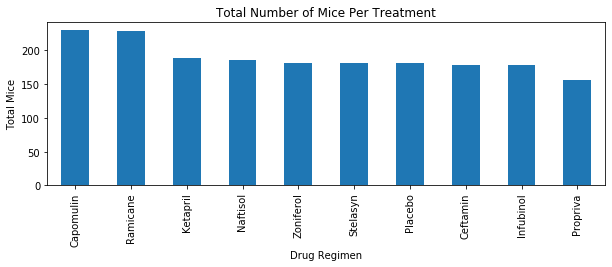

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_data = cleaned_data
bar_df = bar_data[["Drug Regimen", "Mouse ID"]]
bar_df = bar_df["Drug Regimen"].value_counts()
bar_df.plot(kind="bar", figsize=(10,3))
plt.title("Total Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.show()

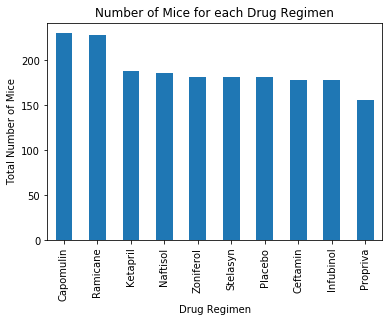

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_data = cleaned_data
bar_df = bar_data["Drug Regimen"].value_counts().plot.bar()
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()



(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

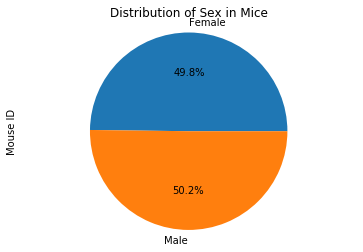

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = merged_data.drop_duplicates(subset=["Mouse ID"], keep="first")

sex_groups = pie_data.groupby(["Sex"])

y = sex_groups["Sex"].unique()

counts = sex_groups["Mouse ID"].count()

pie_chart = counts.plot(kind="pie",autopct="%1.1f%%", y=y, title=("Distribution of Sex in Mice"))

plt.axis("equal")

Male      125
Female    124
Name: Sex, dtype: int64


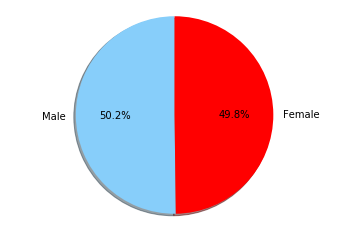

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = merged_data.drop_duplicates(subset=["Mouse ID"], keep="first")
pie_df = pie_data["Sex"].value_counts()
print(pie_df)
colors = ["lightskyblue","red"]
explode = (0,0)
plt.pie(pie_df, labels=["Male", "Female"],  explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin",:]
Ramicane_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Ramicane",:]
Infubinol_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Infubinol",:]
Ceftamin_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Ceftamin",:]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_Capomulin = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
last_Capomulin_vol = pd.DataFrame(last_Capomulin)
merged_Capomulin = pd.merge(last_Capomulin_vol, cleaned_data, on=("Mouse ID", "Timepoint"), how="left")
merged_Capomulin

last_Ramicane = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
last_Ramicane_vol = pd.DataFrame(last_Ramicane)
merged_Ramicane = pd.merge(last_Ramicane_vol, cleaned_data, on=("Mouse ID", "Timepoint"), how="left")
merged_Ramicane

last_Infubinol = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
last_Infubinol_vol = pd.DataFrame(last_Infubinol)
merged_Infubinol = pd.merge(last_Infubinol_vol, cleaned_data, on=("Mouse ID", "Timepoint"), how="left")
merged_Infubinol

last_Ceftamin = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
last_Ceftamin_vol = pd.DataFrame(last_Ceftamin)
merged_Ceftamin = pd.merge(last_Ceftamin_vol, cleaned_data, on=("Mouse ID", "Timepoint"), how="left")
merged_Ceftamin


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels
Capomulin_tumors = merged_Capomulin["Tumor Volume (mm3)"]
Ramicane_tumors = merged_Ramicane["Tumor Volume (mm3)"]
Infubinol_tumors = merged_Infubinol["Tumor Volume (mm3)"]
Ceftamin_tumors = merged_Ceftamin["Tumor Volume (mm3)"]

Drugs_plot = [Capomulin_tumors,Ramicane_tumors,Infubinol_tumors,Ceftamin_tumors]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles_Capomulin = Capomulin_tumors.quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[.25]
upperq_Capomulin = quartiles_Capomulin[.75]
iqr_Capomulin = upperq_Capomulin - lowerq_Capomulin
lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)


quartiles_Ramicane = Ramicane_tumors.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[.25]
upperq_Ramicane = quartiles_Ramicane[.75]
iqr_Ramicane = upperq_Ramicane - lowerq_Ramicane
lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)

quartiles_Infubinol = Infubinol_tumors.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[.25]
upperq_Infubinol = quartiles_Infubinol[.75]
iqr_Infubinol = upperq_Infubinol- lowerq_Infubinol
lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)

quartiles_Ceftamin = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin - lowerq_Ceftamin
lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

infubinol_outlier = sorted(Infubinol_tumors)[0]


print(f"Values below {lower_bound_Capomulin} and {upper_bound_Capomulin} could be outliers for Capomulin")
print(f"Values below {lower_bound_Ramicane} and {upper_bound_Ramicane} could be outliers for Ramicane")
print(f"Values below {lower_bound_Infubinol} and {upper_bound_Infubinol} could be outliers for Infubinol")
print(f"Values below {lower_bound_Ceftamin} and {upper_bound_Ceftamin} could be outliers for Ceftamin")

print(f"Infubinol has one outlier tumor volume of {round(infubinol_outlier,2)} (mm3)")


Values below 20.70456164999999 and 51.83201549 could be outliers for Capomulin
Values below 17.912664470000003 and 54.30681135 could be outliers for Ramicane
Values below 36.83290494999999 and 82.74144559000001 could be outliers for Infubinol
Values below 25.355449580000002 and 87.66645829999999 could be outliers for Ceftamin
Infubinol has one outlier tumor volume of 36.32 (mm3)


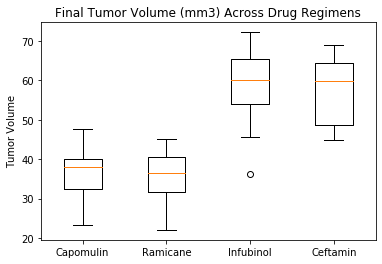

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.set_title("Final Tumor Volume (mm3) Across Drug Regimens")
ax1.set_ylabel("Tumor Volume")
ax1.set_xticklabels(labels, ha="center")
ax1.boxplot(Drugs_plot)
plt.show()

## Line and Scatter Plots

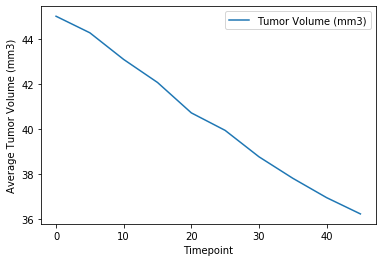

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin",:]
Capomulin_data = Capomulin_df[["Timepoint","Tumor Volume (mm3)"]]
Capomulin_line = Capomulin_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Capomulin_line.plot(x = "Timepoint", y = "Tumor Volume (mm3)", kind = "line")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

No handles with labels found to put in legend.


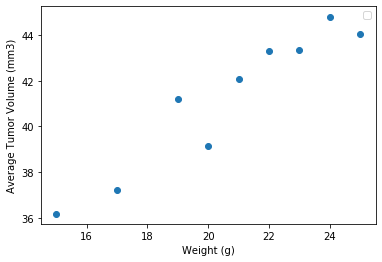

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo_df = Capomulin_df[["Timepoint","Weight (g)","Tumor Volume (mm3)"]]
Capo_df = Capo_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_scatter = Capo_df.reset_index()

volumes = capo_scatter["Tumor Volume (mm3)"]
weights = capo_scatter["Weight (g)"]
plt.scatter(weights,volumes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(loc='best')
plt.show()

## Correlation and Regression

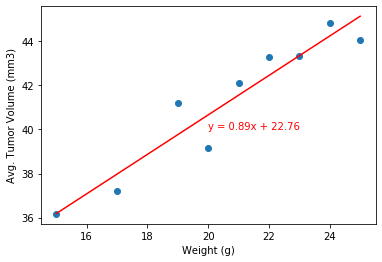

The correlation between Tumor Volume and Mouse weight for the Capomulin treatment is 0.95


In [22]:
## Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
data = Capomulin_df[["Tumor Volume (mm3)", "Weight (g)"]]
data = data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
data = data.reset_index()

tumor_volume = data["Tumor Volume (mm3)"]
weights = data["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, tumor_volume)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weights, tumor_volume)
plt.plot(weights, regress_values, "r-")
plt.annotate(line_eq,(20,40), fontsize=10, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.show()

correlation = st.pearsonr(weights, tumor_volume)
print(f"The correlation between Mouse Weight & Tumor Volume for the Capomulin treatment is {round(correlation[0],2)}")

1. Based on the intial analysis of the statistics, Ramicane & Capomulin stand out with the lowest mean's of tumor volume across all drug regimens. We can see in the Standard Deviation measure that the data for these regimens are lower than the other drug regimens, indicating that the tumor volumes across the two regimens are closer to the mean, and are less variant than other treatments based on tumor volume. 

2. When reviewing the line plot viewing average tumor volume over time, we can see a clear negative correlation depicted in the graph. We can interpret this graph as displaying the negative effect time on the Capomulin regimen has on mice tumor volume in this trial.

3. After finding the correlation coefficient of .95 & linear regression model for the mouse weight and average tumor volume, we can see there is a strong positive correlation and relationship between the weight of mice and their average tumor volume throughout the Capomulin treatment. 
